<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Whether a loan is paid off</font></h1>
<h2 align="center"><font size="5">Dateline: 2022-05-18 23:59:59 Wednesday</font></h2>
<h3 align="center"><font size="5"> Total marks: 4</font></h3>

### Your information:
- Fullname: Nguyễn Thị Kim Hoàng
- Date of birth: 07-09-1990
- Place of birth: Ninh Thuận
- Email: nguyenhoang90.hd08@gmail.com
- Mobile phone: 0944298989

In this notebook, we practice all the knowledge and skills that we learned in this course (LDS5: Data pre-processing and analysis)

We apply the **Logistic Regression Algorithm** to predict: **"Whether a loan is paid off on in collection"** by accuracy evaluation methods.

Lets first load required libraries:

In [1339]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from datetime import datetime
from PIL import Image
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### About dataset

This dataset is about past loans. The __loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection (<b>khoản vay đã trả hết hoặc còn thu tiền</b>)                                           |
| Principal      | Basic principal loan amount at the (<b>Số tiền cho vay gốc</b>)|
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule (<b>lịch trình thanh toán hàng tháng</b>) |
| Effective_date | When the loan got originated and took effects (<b>Ngày thực_hiện khi khoản vay có nguồn gốc và có hiệu lực</b>)                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date (<b> Ngày đến hạn </b>                |
| Age            | Age of applicant (<b>Tuổi của KH vay</b>)                                                                      |
| Education      | Education of applicant (<b>Trình độ học vấn</b>)                                                                |
| Gender         | The gender of applicant (<b>Giới tính</b>)                                                               |

# Load Data From CSV File  

In [1200]:
# Read CSV file: loan_train.csv
df = pd.read_csv('loan_train.csv')

# Thống kê mô tả

In [1201]:
# Understanding to dataset
df.shape

(346, 10)

In [1202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


In [1203]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [1204]:
df.tail()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [1205]:
df.describe(include = 'all')

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
count,346.000000,346.000000,346,346.000000,346.000000,346,346,346.000000,346,346
unique,NaN,NaN,2,NaN,NaN,7,23,NaN,4,2
top,NaN,NaN,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,NaN,High School or Below,male
freq,NaN,NaN,260,NaN,NaN,166,90,NaN,151,294
mean,202.167630,202.167630,NaN,943.641618,22.653179,NaN,NaN,30.939306,NaN,NaN
std,115.459715,115.459715,NaN,109.425530,7.991006,NaN,NaN,6.039418,NaN,NaN
min,0.000000,0.000000,NaN,300.000000,7.000000,NaN,NaN,18.000000,NaN,NaN
25%,107.250000,107.250000,NaN,900.000000,15.000000,NaN,NaN,27.000000,NaN,NaN
50%,204.500000,204.500000,NaN,1000.000000,30.000000,NaN,NaN,30.000000,NaN,NaN
75%,298.750000,298.750000,NaN,1000.000000,30.000000,NaN,NaN,35.000000,NaN,NaN


## Một số nhận xét:

Ta thấy 2 cột Unnamed:0 và Unnamed:0.1 giống nhau và dường như không có ý nghĩa. Ta loại bỏ 2 cột này. Các biến còn lại gồm có: 
+ Biến mục tiêu: loan_status, nhận 2 giá trị PAYOFF và COLLECTION. Bài toán đi dự đoán biến này, thích hợp sử dụng logarith regression.
+ Biến inputs: gồm có 7 biến còn lại.
       * Biến số: principal, age
       * Biến phân loại:
           - Dạng category: education, terms
           - Dạng nominal: gender
       * Hai biến thời gian effective_date và due_date cần được xử lý.

In [1206]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [1207]:
df = df.drop('Unnamed: 0',axis=1)

In [1208]:
df = df.drop('Unnamed: 0.1',axis=1)

In [1209]:
df.shape

(346, 8)

# Phân tích đơn biến

## Biến loan_status

In [1210]:
df['loan_status'].describe()

count         346
unique          2
top       PAIDOFF
freq          260
Name: loan_status, dtype: object

In [1211]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

<AxesSubplot:ylabel='loan_status'>

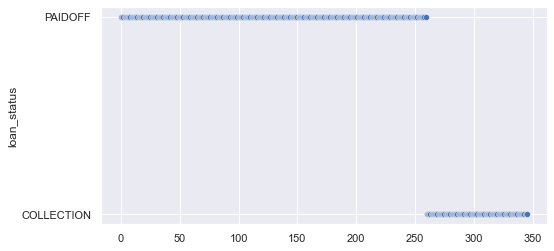

In [1212]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df['loan_status'])

Dữ liệu khá mất cân bằng. Ta cần xử lý sau khi làm sạch dữ liệu. <br>
Đây là biến target và nhận 2 giá trị. Ta chuyển dữ liệu về dạng 0, 1.

## Biến Principal

In [1213]:
df.Principal.describe()

count     346.000000
mean      943.641618
std       109.425530
min       300.000000
25%       900.000000
50%      1000.000000
75%      1000.000000
max      1000.000000
Name: Principal, dtype: float64

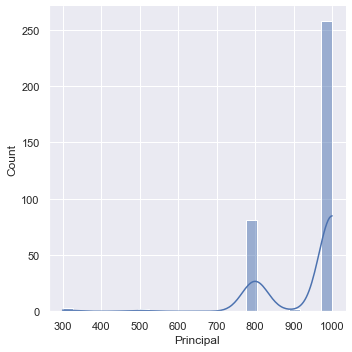

In [1214]:
sns.displot(df.Principal,kde=True)

In [1215]:
df.Principal.value_counts()

1000    258
800      81
300       3
900       2
500       2
Name: Principal, dtype: int64

Mặc dù đây là biến số nhưng chỉ nhận 5 mức giá trị. Ta có thể cân nhắc chuyển sang biến phân loại. Nhưng để tổng quát, với tập số liệu lớn hơn, người phân tích nghĩ vẫn nên để dữ liệu ở dạng biến số. Các giá trị cách nhau rất xa, có thể lấy log biến số này.

## Biến terms

In [1216]:
df.terms.describe()

count    346.000000
mean      22.653179
std        7.991006
min        7.000000
25%       15.000000
50%       30.000000
75%       30.000000
max       30.000000
Name: terms, dtype: float64

<AxesSubplot:ylabel='terms'>

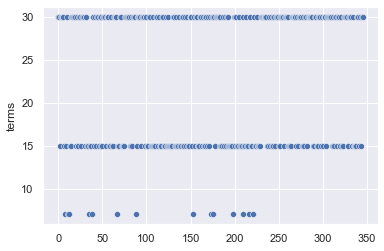

In [1217]:
sns.scatterplot(data = df.terms)

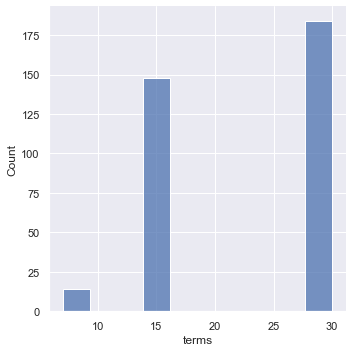

In [1218]:
sns.displot(df.terms)

Lịch trình thanh toán hàng tháng. Tập dữ liệu có 3 dạng thanh toán: 7 ngày, 15 ngày, 30 ngày. Ta nên chuyển dữ liệu này sang dạng category.

## Biến age

In [1219]:
df.age.describe()

count    346.000000
mean      30.939306
std        6.039418
min       18.000000
25%       27.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='age'>

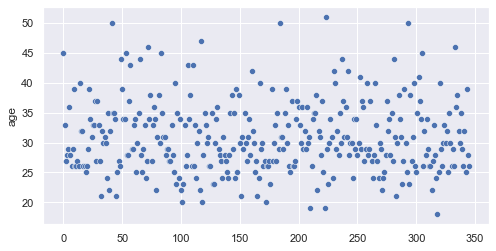

In [1220]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df['age'])

<AxesSubplot:xlabel='age', ylabel='Density'>

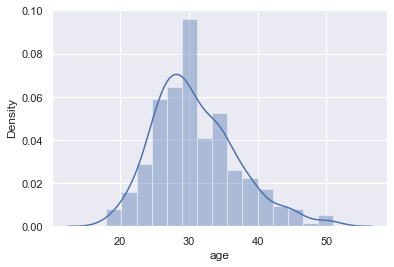

In [1221]:
sns.distplot(df.age,kde=True)

Từ biểu đồ ta thấy, người vay tập trung nhiều nhất ở độ tuổi từ 25-35. Phân phối của biến age có dạng gần với phân phối chuẩn và bị lệch phải. Người phân tích thấy có thể chuyển biến thành dạng category bằng phương pháp bin. Ta có thể chia dư liệu từ < 20 đến 25, 25 đến 35, 35 đến 45 và trên 45. 

## Biến education

In [1222]:
df.education.value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

<AxesSubplot:>

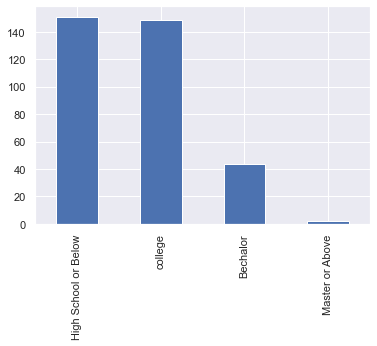

In [1223]:
df.education.value_counts().plot(kind='bar')

Biến ở dạng category. Ta mã hóa các tên biến bằng OnehotEncoder.

## Biến gender

In [1224]:
df.Gender.value_counts()

male      294
female     52
Name: Gender, dtype: int64

<AxesSubplot:>

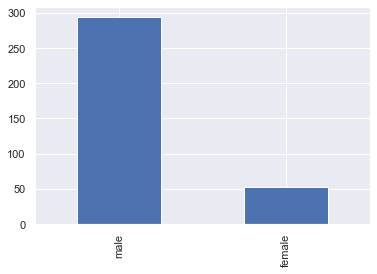

In [1225]:
df.Gender.value_counts().plot(kind='bar')

Đổi biến thành dạng nominal.

# Feature selection

In [1226]:
# chuyển dữ liệu về dạng datetime
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])

### Biến effective_date

In [1227]:
df['effective_day'] = df['due_date'].dt.day
df['effective_month'] = df['due_date'].dt.month
df['effective_year'] = df['due_date'].dt.year

Phân tích biến effective_year

In [1228]:
df.effective_year.value_counts()

2016    346
Name: effective_year, dtype: int64

Biến effective_year chỉ nhận một giá trị 2016. Ta có thể bỏ qua biến này

Phân tích biến effective_month

In [1229]:
df.effective_month.value_counts()

10    181
9     153
11     12
Name: effective_month, dtype: int64

Biến effective_month chỉ nhận 1 số giá trị là tháng 9. Ta sẽ không sử dụng trực tiếp biến này mà kết hợp với biến due_date để tính tổng số ngày của khoản tiền vay (từ thời gian khoản vay có hiệu lực đến ngày đến hạn)

Phân tích biến effective_day

<AxesSubplot:xlabel='effective_day', ylabel='Density'>

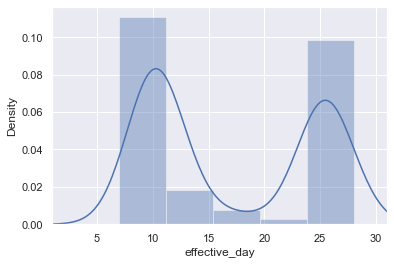

In [1230]:
plt.xlim(1,31)
sns.distplot(df.effective_day)

Có 2 nhóm ngày có số lượng khoản vay lớn. Ta sẽ xem xét đó là thứ mấy trong tuần, và thứ mấy trong năm

In [1231]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['effective_dayofyear'] = df['effective_date'].dt.dayofyear

In [1232]:
df['dayofweek'].value_counts()

6    166
0     87
5     31
2     31
1     20
4      8
3      3
Name: dayofweek, dtype: int64

(array([ 87.,  20.,  31.,   3.,   8.,  31., 166.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

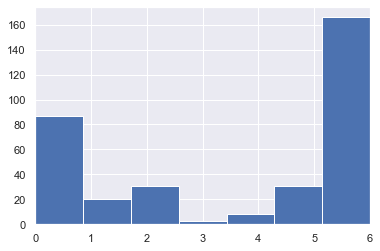

In [1233]:
plt.xlim(0,6)
plt.hist(df.dayofweek, bins=7)

Ta có thể thấy, ngân hàng có các khoản vay có ngày đến hạn đặc biệt nhiều vào chủ nhật và thứ 2. Ta sẽ sử dụng biến df.effective_doweek thay cho biến df.effective_day

## Biến due_date

Kết hợp 2 biến thời gian, ta tính số ngày của khoản vay tính từ thời điểm khoản vay có hiệu lực đến ngày đến hạn.

In [1234]:
noday = []
df['due_dayofyear'] = df['due_date'].dt.dayofyear
for i in range(len(df.due_dayofyear)):
    days = df.due_dayofyear[i] - df.effective_dayofyear[i]
    noday.append(days)
df['numofday'] = noday
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,effective_day,effective_month,effective_year,dayofweek,effective_dayofyear,due_dayofyear,numofday
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,7,10,2016,3,252,281,29
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,7,10,2016,3,252,281,29
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,22,9,2016,3,252,266,14
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,8,10,2016,4,253,282,29
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,8,10,2016,4,253,282,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,25,9,2016,6,255,269,14
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,10,10,2016,6,255,284,29
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,26,9,2016,0,256,270,14
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,10,11,2016,0,256,315,59


In [1235]:
df['numofday'].value_counts()

29    176
14    139
59     12
6      11
44      5
13      3
Name: numofday, dtype: int64

<AxesSubplot:>

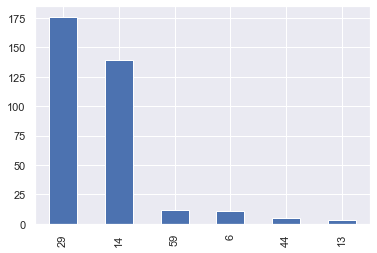

In [1236]:
df['numofday'].value_counts().plot(kind='bar')

Ta biến đổi biến này về dạng category. Sử dụng labelencoder.

# Phân tích 2 biến

## Biến liên tục và biến phân loại

### Biến Principal và loan_status

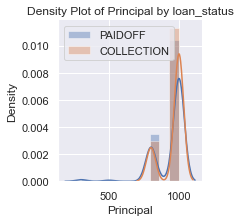

In [1237]:
_, bins = np.histogram(df['Principal'])
g = sns.FacetGrid(df,hue = 'loan_status')
g = g.map(sns.distplot,'Principal', bins = bins)


plt.ylabel("Density")
plt.xlabel("Principal")
plt.title("Density Plot of Principal by loan_status")
plt.legend()
plt.show()

Số lượng khoản vay giữa các mức tiền khá đồng đều.

### Biến Principal và terms

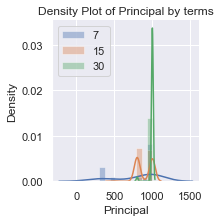

In [1238]:
_, bins = np.histogram(df['Principal'])
g = sns.FacetGrid(df,hue = 'terms')
g = g.map(sns.distplot,'Principal', bins = bins)


plt.ylabel("Density")
plt.xlabel("Principal")
plt.title("Density Plot of Principal by terms")
plt.legend()
plt.show()

Ở loại khoản vay 7 ngày, số khoản vay ít, và tập trung ở mức vay 1000.
Ở loại khoản vay 15 ngày, chia đều ở 2 mức vay 800 và 1000. 
Ở loại khoản vay 30 ngày, tập trung chủ yếu ở mức vay 1000.

### Biến Principal và Gender

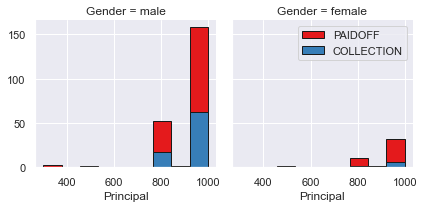

In [1239]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()

Có thể thấy, nam vay nhiều hơn nữ và lượng Collection cũng rất cao.

## Biến phân loại và biến phân loại

### Biến terms và loan_status

In [1240]:
terms_status = pd.crosstab(df.terms, df.loan_status)
terms_status

loan_status,COLLECTION,PAIDOFF
terms,,
7,0,14
15,34,114
30,52,132


<AxesSubplot:xlabel='terms'>

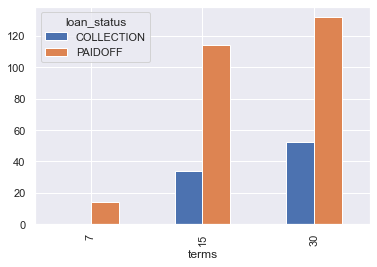

In [1241]:
terms_status.plot.bar()

Ở thời hạn vay 7 ngày, không có trường hợp Collection.
Ở 2 thời hạn vay 15,30 có trường hợp Collection, nhưng ít hơn Payoff.

### Biến terms, numofday và loan_status

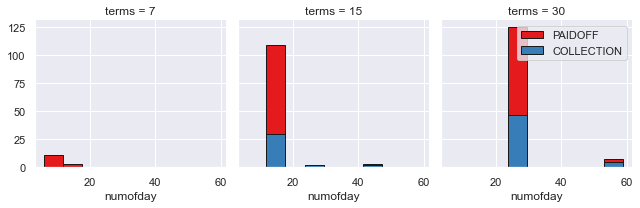

In [1242]:
bins = np.linspace(df.numofday.min(), df.numofday.max(), 10)
g = sns.FacetGrid(df, col="terms", hue="loan_status", palette="Set1", col_wrap=3)
g.map(plt.hist, 'numofday', bins=bins, ec="k")

g.axes[-1].legend()

Biến numofday cho thấy có tương quan lớn với biến terms. Có thể ta không cần sử dụng biến dayofyear



In [1243]:
df[['terms','numofday']].corr()

,terms,numofday
terms,1.000000,0.777912
numofday,0.777912,1.000000


### Biến Age, Gender và biến loan_status

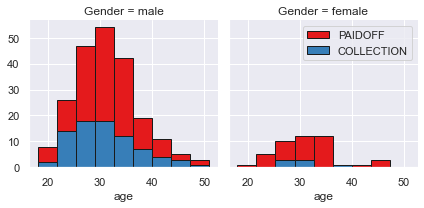

In [1244]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

Ở nam, có collection ở tất cả độ tuổi. Tập trung nhiều quanh độ tuổi 30.
Ở nữ, quanh độ tuổi 30 mới mới có collection.

### Biến dayofweek, loan_status  và Gender

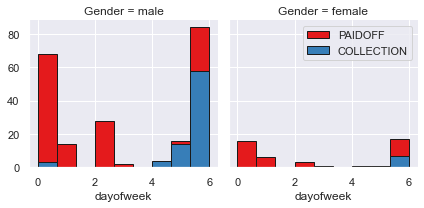

In [1245]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

Ta thấy rằng, từ ngày 4,5,6, lượng khoản vay collection rất lớn so với các ngày còn lại. Ta tạo một biến mới là weekend, là biến binary với ngưỡng ngày lớn hơn hay bằng 4.

In [1246]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,effective_day,effective_month,effective_year,dayofweek,effective_dayofyear,due_dayofyear,numofday,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,7,10,2016,3,252,281,29,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,7,10,2016,3,252,281,29,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,22,9,2016,3,252,266,14,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,8,10,2016,4,253,282,29,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,8,10,2016,4,253,282,29,1


# Pre-processing:

### Biến loan_status

In [1247]:
df = pd.get_dummies(df, columns=['loan_status'],drop_first=True)
df.columns = ['loan_status' if x=='loan_status_PAIDOFF' else x for x in df.columns]
df

,Principal,terms,effective_date,due_date,age,education,Gender,effective_day,effective_month,effective_year,dayofweek,effective_dayofyear,due_dayofyear,numofday,weekend,loan_status
0,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,7,10,2016,3,252,281,29,0,1
1,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,7,10,2016,3,252,281,29,0,1
2,1000,15,2016-09-08,2016-09-22,27,college,male,22,9,2016,3,252,266,14,0,1
3,1000,30,2016-09-09,2016-10-08,28,college,female,8,10,2016,4,253,282,29,1,1
4,1000,30,2016-09-09,2016-10-08,29,college,male,8,10,2016,4,253,282,29,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,800,15,2016-09-11,2016-09-25,32,High School or Below,male,25,9,2016,6,255,269,14,1,0
342,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,10,10,2016,6,255,284,29,1,0
343,800,15,2016-09-12,2016-09-26,39,college,male,26,9,2016,0,256,270,14,0,0
344,1000,30,2016-09-12,2016-11-10,28,college,male,10,11,2016,0,256,315,59,0,0


### Biến Principal

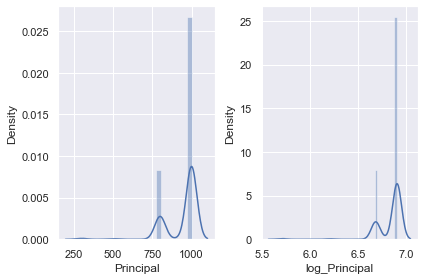

In [1248]:
df['log_Principal'] = np.log(df['Principal'])
plt.subplot(1, 2, 1)
sns.distplot(df['Principal'])

plt.subplot(1, 2, 2)
sns.distplot(df['log_Principal'])
plt.tight_layout()

### Biến terms

In [1249]:
encode = preprocessing.LabelEncoder()
df.terms = encode.fit_transform(df.terms)
df

,Principal,terms,effective_date,due_date,age,education,Gender,effective_day,effective_month,effective_year,dayofweek,effective_dayofyear,due_dayofyear,numofday,weekend,loan_status,log_Principal
0,1000,2,2016-09-08,2016-10-07,45,High School or Below,male,7,10,2016,3,252,281,29,0,1,6.907755
1,1000,2,2016-09-08,2016-10-07,33,Bechalor,female,7,10,2016,3,252,281,29,0,1,6.907755
2,1000,1,2016-09-08,2016-09-22,27,college,male,22,9,2016,3,252,266,14,0,1,6.907755
3,1000,2,2016-09-09,2016-10-08,28,college,female,8,10,2016,4,253,282,29,1,1,6.907755
4,1000,2,2016-09-09,2016-10-08,29,college,male,8,10,2016,4,253,282,29,1,1,6.907755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,800,1,2016-09-11,2016-09-25,32,High School or Below,male,25,9,2016,6,255,269,14,1,0,6.684612
342,1000,2,2016-09-11,2016-10-10,25,High School or Below,male,10,10,2016,6,255,284,29,1,0,6.907755
343,800,1,2016-09-12,2016-09-26,39,college,male,26,9,2016,0,256,270,14,0,0,6.684612
344,1000,2,2016-09-12,2016-11-10,28,college,male,10,11,2016,0,256,315,59,0,0,6.907755


### Biến Age

In [1250]:
bins = [-np.inf, 25, 35,45,np.inf]
df.age = pd.cut(df.age,bins)
df.age = encode.fit_transform(df.age)

### Biến education

In [1251]:
edu1hot = pd.DataFrame()
onehot = preprocessing.OneHotEncoder()
onehot.fit(df[['education']])
education1hot = onehot.transform(df[['education']]).toarray()
edu1hot = pd.DataFrame(education1hot, columns = ['education_'+ i  for i in onehot.categories_[0]]) 
df = pd.concat([df,edu1hot],axis=1)
df = df.drop(['education','education_Master or Above'],axis = 1)

### Biến Gender

In [1252]:
df = pd.get_dummies(df, columns=['Gender'],drop_first=True)
df.columns = ['Gender' if x=='Gender_male' else x for x in df.columns]
df

,Principal,terms,effective_date,due_date,age,effective_day,effective_month,effective_year,dayofweek,effective_dayofyear,due_dayofyear,numofday,weekend,loan_status,log_Principal,education_Bechalor,education_High School or Below,education_college,Gender
0,1000,2,2016-09-08,2016-10-07,2,7,10,2016,3,252,281,29,0,1,6.907755,0.0,1.0,0.0,1
1,1000,2,2016-09-08,2016-10-07,1,7,10,2016,3,252,281,29,0,1,6.907755,1.0,0.0,0.0,0
2,1000,1,2016-09-08,2016-09-22,1,22,9,2016,3,252,266,14,0,1,6.907755,0.0,0.0,1.0,1
3,1000,2,2016-09-09,2016-10-08,1,8,10,2016,4,253,282,29,1,1,6.907755,0.0,0.0,1.0,0
4,1000,2,2016-09-09,2016-10-08,1,8,10,2016,4,253,282,29,1,1,6.907755,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,800,1,2016-09-11,2016-09-25,1,25,9,2016,6,255,269,14,1,0,6.684612,0.0,1.0,0.0,1
342,1000,2,2016-09-11,2016-10-10,0,10,10,2016,6,255,284,29,1,0,6.907755,0.0,1.0,0.0,1
343,800,1,2016-09-12,2016-09-26,2,26,9,2016,0,256,270,14,0,0,6.684612,0.0,0.0,1.0,1
344,1000,2,2016-09-12,2016-11-10,1,10,11,2016,0,256,315,59,0,0,6.907755,0.0,0.0,1.0,1


In [1007]:
encode = preprocessing.LabelEncoder()
df['numofday'] = encode.fit_transform(df['numofday'])
df

,terms,age,loan_status,log_Principal,education_Bechalor,education_High School or Below,education_college,Gender,numofday
0,2,0,1,6.907755,0.0,1.0,0.0,1,3
1,2,0,1,6.907755,1.0,0.0,0.0,0,3
2,1,0,1,6.907755,0.0,0.0,1.0,1,2
3,2,0,1,6.907755,0.0,0.0,1.0,0,3
4,2,0,1,6.907755,0.0,0.0,1.0,1,3
...,...,...,...,...,...,...,...,...,...
341,1,0,0,6.684612,0.0,1.0,0.0,1,2
342,2,0,0,6.907755,0.0,1.0,0.0,1,3
343,1,0,0,6.684612,0.0,0.0,1.0,1,2
344,2,0,0,6.907755,0.0,0.0,1.0,1,5


Ta bỏ các biến không cần thiết:


In [1253]:
df = df[['terms','age','weekend','log_Principal','education_Bechalor','education_High School or Below','education_college','Gender','loan_status']]

# Classification 

Now, use the training set to build an accurate model. Then use the test set (loan_test.csv) to report the accuracy of the model
You should use the following algorithm:
- Logistic Regression

__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Logistic Regression

In [997]:
y_train = df['loan_status']

In [998]:
X_train = df.drop('loan_status',axis=1)

In [999]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [1000]:
model.classes_

array([0, 1], dtype=uint8)

In [1331]:
print('Train Score:', model.score(X_train, y_train))

Train Score: 0.7514450867052023


# Model Evaluation using Test set

### Load Test set for evaluation 

In [1302]:
# Read CSV file: loan_test.csv
test = pd.read_csv('loan_test.csv')

In [1303]:
test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [1304]:
test.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

### Pre-processing

In [1305]:
test = test.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male
5,PAIDOFF,700,15,9/11/2016,9/25/2016,33,High School or Below,male
6,PAIDOFF,1000,15,9/11/2016,9/25/2016,24,college,male
7,PAIDOFF,1000,30,9/11/2016,10/10/2016,32,Bechalor,male
8,PAIDOFF,800,15,9/11/2016,9/25/2016,27,college,female
9,PAIDOFF,1000,15,9/11/2016,9/25/2016,37,college,male


In [1323]:
test['log_Principal'] = np.log(test['Principal'])

In [1306]:
test = pd.get_dummies(test, columns=['loan_status'],drop_first=True)
test.columns = ['loan_status' if x=='loan_status_PAIDOFF' else x for x in test.columns]

In [1308]:
bins = [-np.inf, 25, 35,45,np.inf]
test.age = pd.cut(test.age,bins)
test.age = encode.fit_transform(test.age)

In [1313]:
edu1hot = pd.DataFrame()
onehot = preprocessing.OneHotEncoder()
onehot.fit(test[['education']])
education1hot = onehot.transform(test[['education']]).toarray()
edu1hot = pd.DataFrame(education1hot, columns = ['education_'+ i  for i in onehot.categories_[0]]) 
test = pd.concat([test,edu1hot],axis=1)
test = test.drop(['education','education_Master or Above'],axis = 1)

In [1314]:
test = pd.get_dummies(test, columns=['Gender'],drop_first=True)
test.columns = ['Gender' if x=='Gender_male' else x for x in test.columns]

In [1316]:
test['effective_date'] = pd.to_datetime(test['effective_date'])
test['dayofweek'] = test['effective_date'].dt.dayofweek
test['weekend'] = test['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [1324]:
test = test[['terms','age','weekend','log_Principal','education_Bechalor','education_High School or Below','education_college','Gender','loan_status']]

### Predict

In [1326]:
y_test = test[['loan_status']]
X_test = test.drop('loan_status',axis=1)
X_test.head()

,terms,age,weekend,log_Principal,education_Bechalor,education_High School or Below,education_college,Gender
0,30,3,0,6.907755,1.0,0.0,0.0,0
1,7,1,1,5.703782,0.0,0.0,0.0,1
2,30,2,1,6.907755,0.0,1.0,0.0,0
3,30,1,1,6.907755,0.0,0.0,1.0,1
4,15,1,1,6.684612,1.0,0.0,0.0,1


In [1333]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [992]:
model.predict_proba(X_test) 

array([[0.30603033, 0.69396967],
       [0.22091555, 0.77908445],
       [0.23243563, 0.76756437],
       [0.33255741, 0.66744259],
       [0.29819857, 0.70180143],
       [0.23243563, 0.76756437],
       [0.27328999, 0.72671001],
       [0.27328999, 0.72671001],
       [0.33255741, 0.66744259],
       [0.44312955, 0.55687045],
       [0.29819857, 0.70180143],
       [0.29819857, 0.70180143],
       [0.13641293, 0.86358707],
       [0.30603033, 0.69396967],
       [0.20524018, 0.79475982],
       [0.06907473, 0.93092527],
       [0.34085328, 0.65914672],
       [0.22587426, 0.77412574],
       [0.29819857, 0.70180143],
       [0.27328999, 0.72671001],
       [0.17653439, 0.82346561],
       [0.29819857, 0.70180143],
       [0.5063225 , 0.4936775 ],
       [0.20691714, 0.79308286],
       [0.06138443, 0.93861557],
       [0.30603033, 0.69396967],
       [0.30603033, 0.69396967],
       [0.0974568 , 0.9025432 ],
       [0.29819857, 0.70180143],
       [0.11153854, 0.88846146],
       [0.

In [1330]:
print('Test Score:', model.score(X_test, y_test))

Test Score: 0.7407407407407407


In [1340]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 0, 14],
       [ 0, 40]])

In [1337]:
TN = 0 # dự đoán đúng trường hợp 0
TP = 40 # dự đoán đúng trường hợp 1
FP = 14 # dự đoán sai: thực tế là 0 ==> dự đoán là 1
FN = 0 # dự đoán sai: thực tế là 1 ==> dự đoán là 0
# Tập test không chứa trường hợp 0

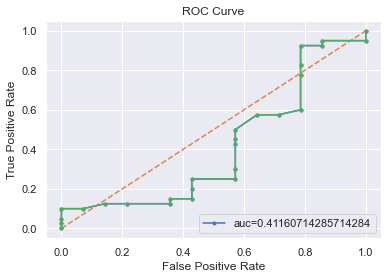

In [1342]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, marker='.', label="auc="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)
plt.show()

<h3>Thanks for completing this project!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>
<hr>
<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>